In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
wine = load_wine()
X = wine.data  # Fitur
y = wine.target  # Label

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
rf = RandomForestClassifier()

In [6]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon di hutan
    'max_depth': [None, 10, 20, 30],  # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10]  # Jumlah minimum sampel untuk membagi node
}

In [7]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [8]:
print(f"Hyperparameter terbaik: {grid_search.best_params_}")

Hyperparameter terbaik: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}


In [9]:
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=50)

In [10]:
y_pred = best_rf.predict(X_test)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model: {accuracy * 100:.2f}%')

Akurasi model: 98.15%


In [12]:
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [13]:
importances = best_rf.feature_importances_  # Mengambil pentingnya fitur
feature_names = wine.feature_names  # Nama-nama fitur
feat_importances = pd.Series(importances, index=feature_names)

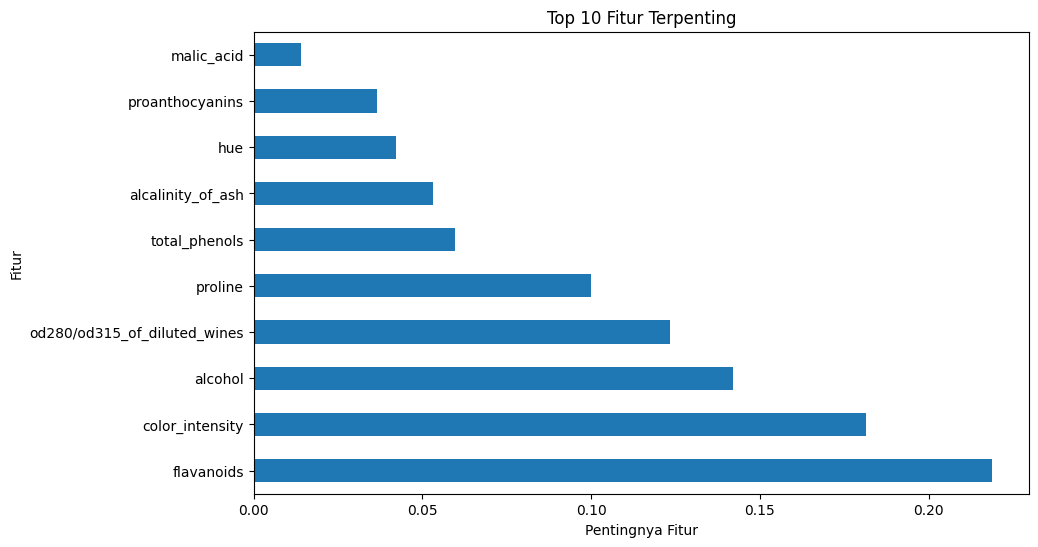

In [14]:
plt.figure(figsize=(10, 6))
feat_importances.nlargest(10).plot(kind='barh')  # Menampilkan 10 fitur terpenting
plt.title('Top 10 Fitur Terpenting')
plt.xlabel('Pentingnya Fitur')
plt.ylabel('Fitur')
plt.show()